In [1]:
#Se analizara los datos de los lugares de bogota segun su estrato y opiniones
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
#Se hara clustering con la informacion de calificaciones (ultimas 4 columnas)
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

In [2]:
#lectura de los dataframes de marcas reconocidas
path='./LugaresBogotaCompleto.csv'
dfLugares=pd.read_csv(path)
dfLugares=dfLugares.drop(columns='Unnamed: 0')

In [3]:
#Se deben cambiar los SC (sin calificacion por 0) y los NR (No rated) por ceros
CRat0=[0.0 if i=='SC' else float(i) for i in dfLugares['CRat']]
dfLugares['CRat']=CRat0

Rat0=[0.0 if i=='NR' else float(i) for i in dfLugares['Rat']]
dfLugares['Rat']=Rat0

In [4]:
pd.set_option('display.max_rows', 10)
L=len(dfLugares)
dfLugares

,name,categories,lat,lng,id,NumPunto,Estrato,CRat,Rat,CFot,COpi
0,El Fogón Del Llano,Cajun / Creole Restaurant,4.468930,-74.127996,4f4a782de4b0cccedd61818b,134,2,0.0,0.0,0.0,0.0
1,Plaza de Usme,Plaza,4.469970,-74.126363,4f4a3862e4b0eddb52dd97bb,135,2,0.0,0.0,12.0,0.0
2,Juan Valdez,Café,4.477763,-74.122131,537260f7498e7c622a9bf03a,245,1,0.0,0.0,0.0,0.0
3,agroparque los soches,Field,4.483056,-74.091950,51ebe330498eecb9a833ac50,367,1,0.0,0.0,3.0,0.0
4,Lacteos Santa Monica,Health Food Store,4.490626,-74.148808,5bd1f68e12c8f0002cc8b39c,445,2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7483,TÍPICA sopas y picadas,Steakhouse,4.815070,-74.031742,53d41873498e67ffa980e88d,14903,6,12.0,6.4,13.0,5.0
7484,Club Chalaneria Guadalupe,Stables,4.817814,-74.069090,563e6a79498e41debf3b8dab,14926,6,0.0,0.0,0.0,0.0
7485,Al Limite Paintball,Paintball Field,4.818875,-74.032603,4ca77d9ba6e08cfa63508594,14944,6,37.0,8.2,51.0,13.0
7486,Refugio Hípica - Club Guaymaral,Stables,4.820947,-74.039281,503913f2e4b0cc82fd815e42,14978,6,0.0,0.0,11.0,1.0


In [5]:
#Se obtendran varias graficas por estratos

def FreqEstr(dfLugares,h,StrName):
    dfGroupEstrato=dfLugares.groupby(['Estrato']).count()
    dfGroupEstrato['categories']=100*dfGroupEstrato['name']/(dfGroupEstrato['name'].sum())
    dfGroupEstrato=dfGroupEstrato.rename(columns={'name':'FreqEstrato','categories':'FreqRelEstrato'})
    dfGroupEstrato=dfGroupEstrato.drop(['lat','lng','id','NumPunto','CRat','Rat','CFot','COpi'],axis=1)
    if len(dfGroupEstrato.index)<6:
        l=[i for i in range(1,7) if i not in dfGroupEstrato.index.tolist()]
        for j in l:
            dfGroupEstrato=dfGroupEstrato.append(pd.Series([0,0], index=['FreqEstrato','FreqRelEstrato'],name=j))
            dfGroupEstrato=dfGroupEstrato.sort_values(by=['Estrato'],ascending=True)
                       
    #Grafica
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    #fig, ax=plt.subplots()
    labels=['Stratum1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6']
    ax.bar(labels,dfGroupEstrato['FreqEstrato'],color='orange')
    #plt.title('Number locations in each stratum of Bogota')
    plt.ylabel('Number of venues')
    plt.title('Number of locations in each stratum of Bogota')
    for index,value in enumerate(dfGroupEstrato['FreqRelEstrato']):
        plt.annotate(str(round(value,1))+'%', xy=(index-0.15,dfGroupEstrato.iloc[index]['FreqEstrato']+h), color='black')


    plt.savefig(StrName+'.pdf', bbox_inches='tight')
    plt.savefig(StrName+'.png', bbox_inches='tight')
    plt.show()
    plt.close(fig)

    return dfGroupEstrato

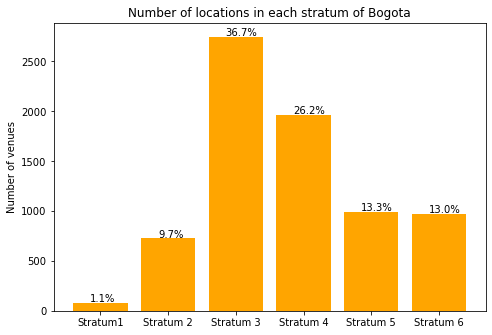

,FreqEstrato,FreqRelEstrato
Estrato,,
1,81,1.081731
2,727,9.708868
3,2749,36.712073
4,1965,26.241987
5,993,13.261218
6,973,12.994124


In [6]:
FreqEstr(dfLugares,10,'NLugaresVSEstrato')

In [7]:
#agrupando por categories
dfGroupCategorie=dfLugares.groupby(['categories']).count().sort_values(by=['name'],ascending=False)
dfGroupCategorie

,name,lat,lng,id,NumPunto,Estrato,CRat,Rat,CFot,COpi
categories,,,,,,,,,,
Restaurant,396,396,396,396,396,396,396,396,396,396
Burger Joint,305,305,305,305,305,305,305,305,305,305
Bakery,246,246,246,246,246,246,246,246,246,246
Fast Food Restaurant,237,237,237,237,237,237,237,237,237,237
Pizza Place,228,228,228,228,228,228,228,228,228,228
...,...,...,...,...,...,...,...,...,...,...
Herbs & Spices Store,1,1,1,1,1,1,1,1,1,1
Hawaiian Restaurant,1,1,1,1,1,1,1,1,1,1
Go Kart Track,1,1,1,1,1,1,1,1,1,1


In [8]:
#Observacion de datos
#dfCluster=dfLugares.drop(columns=['name','categories','lat','lng','id','NumPunto','Estrato'])
#dfCluster.describe().T
dfLugares.drop(columns=['name','categories','lat','lng','id','NumPunto','Estrato']).describe().T

,count,mean,std,min,25%,50%,75%,max
CRat,7488.0,49.888488,197.856577,0.0,0.0,11.0,32.0,10050.0
Rat,7488.0,4.686899,3.517750,0.0,0.0,6.5,7.5,9.5
CFot,7488.0,32.731036,187.122366,0.0,1.0,5.0,17.0,10368.0
COpi,7488.0,10.379274,36.564590,0.0,0.0,2.0,8.0,2105.0


In [9]:
hist = dfCluster['Rat'].hist(bins=10,label=plt.xlabel('Number of venues'))

NameError: name 'dfCluster' is not defined

In [10]:
boxplot = dfCluster.boxplot(column=['CFot', 'COpi', 'CRat'])

NameError: name 'dfCluster' is not defined

In [11]:
#Se observan muchos valores en cero, se van a contabilizar en cada categoria para saber que porcentaje del total tienen en cada
#caso
print('cantidad cero fotos:',round(100*len(dfLugares[dfLugares['CFot']==0])/L,2),'% en numero',len(dfLugares[dfLugares['CFot']==0]))
print('cantidad cero opiniones:',round(100*len(dfLugares[dfLugares['COpi']==0])/L,2),'% en numero',len(dfLugares[dfLugares['COpi']==0]))
print('cantidad cero CRat:',round(100*len(dfLugares[dfLugares['CRat']==0])/L,2),'% en numero',len(dfLugares[dfLugares['CRat']==0]))
print('cantidad cero Rat:',round(100*len(dfLugares[dfLugares['Rat']==0])/L,2),'% en numero',len(dfLugares[dfLugares['Rat']==0]))

cantidad cero fotos: 15.96 % en numero 1195
cantidad cero opiniones: 27.46 % en numero 2056
cantidad cero CRat: 35.51 % en numero 2659
cantidad cero Rat: 35.15 % en numero 2632


In [12]:
#Analisis para los lugares que tienen solo ceros en las columnas de calificacion
dfLugaresT0=dfLugares[dfLugares['CFot']==0]
dfLugaresT0=dfLugaresT0[dfLugaresT0['CRat']==0]
dfLugaresT0=dfLugaresT0[dfLugaresT0['Rat']==0]
dfLugaresT0=dfLugaresT0[dfLugaresT0['COpi']==0]
dfLugaresT0 #Dataframe que tienen cero en todas las columnas de calificacion
#len(dfLugaresT0) #750 lugares estan llenos de cero en sus calificaciones

#Al observar la columna Rat se observo que en la mayoria de casos en que CRat es cero, Rat esta tambien lo era, esto se
#debe a que cuando no se ha dado ninguna calificacion FourSquare no da ningun valor, en ese caso se decidio colocar el
#valor en cero. Se observo que 14 casos a pesar de no haber calificaciones se daba un valor en la columna Rat, esto se 
#puede deber a que Four Square importa dicha informacion de otras fuentes en las que no se tiene la cantidad de 
#calificadores o simplemente es informacion que se perdio por alguna razon desconocida

,name,categories,lat,lng,id,NumPunto,Estrato,CRat,Rat,CFot,COpi
0,El Fogón Del Llano,Cajun / Creole Restaurant,4.468930,-74.127996,4f4a782de4b0cccedd61818b,134,2,0.0,0.0,0.0,0.0
2,Juan Valdez,Café,4.477763,-74.122131,537260f7498e7c622a9bf03a,245,1,0.0,0.0,0.0,0.0
4,Lacteos Santa Monica,Health Food Store,4.490626,-74.148808,5bd1f68e12c8f0002cc8b39c,445,2,0.0,0.0,0.0,0.0
8,Cafeteria Santillana,Breakfast Spot,4.501500,-74.115666,5174383a498e0a5532ec0c34,640,2,0.0,0.0,0.0,0.0
11,Home Theater,Movie Theater,4.503666,-74.109735,4efccc48722e0f076f16f676,704,2,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7451,vivero monteperla,Garden Center,4.794253,-74.039917,52f6615711d28d6880891cc5,14653,6,0.0,0.0,0.0,0.0
7461,el sham,BBQ Joint,4.804493,-74.039726,506f3af8e4b04f4747da208b,14777,4,0.0,0.0,0.0,0.0
7464,Tennis,Clothing Store,4.807073,-74.039603,4f7e1c2ae4b0f67484a2dcfd,14818,4,0.0,0.0,0.0,0.0
7477,Mi Montaña,Scenic Lookout,4.807532,-74.015064,4d2e5a90da7cb60c89be6ed4,14831,6,0.0,0.0,0.0,0.0


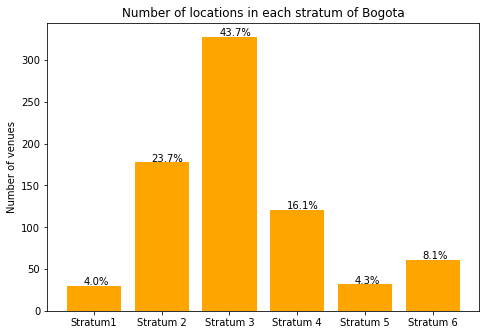

,FreqEstrato,FreqRelEstrato
Estrato,,
1,30,4.000000
2,178,23.733333
3,328,43.733333
4,121,16.133333
5,32,4.266667
6,61,8.133333


In [13]:
FreqEstr(dfLugaresT0,1,'NLugaresT0VSEstrato')

In [14]:
#Data frame enla que no hay ningun cero en las columnas decalificacion de opinion
dfLugaresNone0=dfLugares[dfLugares['CFot']!=0]
dfLugaresNone0=dfLugaresNone0[dfLugaresNone0['CRat']!=0]
dfLugaresNone0=dfLugaresNone0[dfLugaresNone0['Rat']!=0]
dfLugaresNone0=dfLugaresNone0[dfLugaresNone0['COpi']!=0]
dfLugaresNone0 #Dataframe que tienen cero en todas las columnas de calificacion
#len(dfLugaresNone0) #4314 lugares estan llenos de cero en sus calificaciones

,name,categories,lat,lng,id,NumPunto,Estrato,CRat,Rat,CFot,COpi
32,Altavista Centro Comercial,Shopping Mall,4.531533,-74.117954,4e7395b41495dffb8efb639a,1244,2,51.0,6.9,31.0,7.0
33,Royal Films Multicine Altavista,Multiplex,4.532756,-74.118086,4fdf96fde4b0f37d57c9a91f,1244,2,17.0,6.3,12.0,5.0
37,Parque Entre Nubes,Outdoors & Recreation,4.539214,-74.093699,4e43ed7cae605a14b7dfb7ef,1399,2,10.0,6.7,11.0,2.0
93,Tiendas Metro 20 De Julio,Grocery Store,4.569346,-74.099905,4e24517bb3add90f9f4b7b76,2087,3,40.0,5.0,16.0,11.0
112,Bosque San Carlos,Park,4.574397,-74.105784,4e1085407d8b4d5613d24d70,2167,3,108.0,7.7,69.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
7466,Hamburguesas El Corral,Burger Joint,4.807127,-74.038673,4d24c0c1e704b60cbd8463a9,14819,4,34.0,6.9,23.0,6.0
7471,Oktoberfest Guaymaral,Brewery,4.808195,-74.034961,5250647c498e85efc8d06423,14821,4,30.0,6.9,34.0,9.0
7483,TÍPICA sopas y picadas,Steakhouse,4.815070,-74.031742,53d41873498e67ffa980e88d,14903,6,12.0,6.4,13.0,5.0
7485,Al Limite Paintball,Paintball Field,4.818875,-74.032603,4ca77d9ba6e08cfa63508594,14944,6,37.0,8.2,51.0,13.0


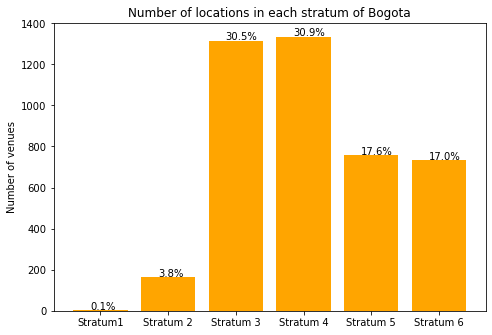

,FreqEstrato,FreqRelEstrato
Estrato,,
1,5,0.115902
2,165,3.824757
3,1315,30.482151
4,1335,30.945758
5,759,17.593880
6,735,17.037552


In [15]:
FreqEstr(dfLugaresNone0,3,'NLugaresNone0VSEstrato')

In [16]:
#data frame con uno o mas ceros en columnas de calificacion
index123ceros=[i for i in range(L) if i not in dfLugaresT0.index and i not in dfLugaresNone0.index] #indice de los lugares
dfLugares123ceros=dfLugares.iloc[index123ceros,:]                                                   #que tienen 1, 2 o 3 
dfLugares123ceros                                                                                   #ceros en calificacion
                                                                                                    #de opinion

,name,categories,lat,lng,id,NumPunto,Estrato,CRat,Rat,CFot,COpi
1,Plaza de Usme,Plaza,4.469970,-74.126363,4f4a3862e4b0eddb52dd97bb,135,2,0.0,0.0,12.0,0.0
3,agroparque los soches,Field,4.483056,-74.091950,51ebe330498eecb9a833ac50,367,1,0.0,0.0,3.0,0.0
5,Parque Nacional Natural Sumapaz,Mountain,4.496649,-74.122158,4f4a9b3fe4b0962089c459a9,576,1,0.0,0.0,12.0,0.0
6,Parque cantarrana,Dog Run,4.496933,-74.117834,50e34c2ee4b05f2b166bd9bd,578,1,0.0,0.0,5.0,2.0
7,Panaderia Ramirez 2,Deli / Bodega,4.497773,-74.108141,536e92eb498ecc66d33654db,583,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7479,Aviopartes,Airport Terminal,4.815171,-74.068982,4c8010d751ada1cd33560610,14885,6,0.0,0.0,1.0,0.0
7480,Torre De Control Aeropuerto Guaymaral,Airport,4.814531,-74.067583,515ebd37e4b08ba1ecc215ac,14885,6,0.0,0.0,4.0,0.0
7481,Aeropuerto Guaymaral,Airport,4.814007,-74.060262,5074737b39505cdb69803752,14889,6,23.0,7.7,31.0,0.0
7482,Canchas ETB - Torneo Revengue,Soccer Field,4.814210,-74.034938,506880bfe4b08b3221350cc4,14902,6,0.0,0.0,5.0,1.0


In [17]:
dfLugares123ceros.describe()

,lat,lng,NumPunto,Estrato,CRat,Rat,CFot,COpi
count,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000,2424.000000
mean,4.668376,-74.094661,7888.949670,3.399340,2.337046,1.569348,3.580858,0.851073
std,0.061348,0.038658,3990.598532,1.129545,5.881679,2.944310,9.931714,1.704699
min,4.468104,-74.209052,135.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.622930,-74.120220,4551.000000,3.000000,0.000000,0.000000,1.000000,0.000000
50%,4.668548,-74.094448,6412.000000,3.000000,0.000000,0.000000,2.000000,0.000000
75%,4.712454,-74.065271,11982.000000,4.000000,0.000000,0.000000,4.000000,1.000000
max,4.826114,-74.010755,14978.000000,6.000000,69.000000,8.700000,306.000000,35.000000


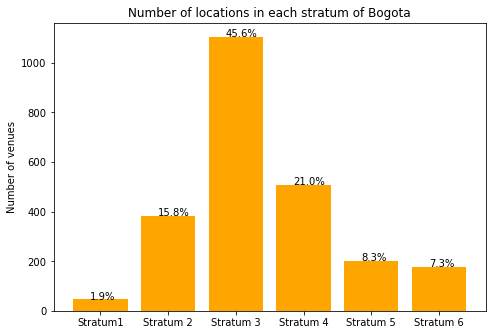

,FreqEstrato,FreqRelEstrato
Estrato,,
1,46,1.897690
2,384,15.841584
3,1106,45.627063
4,509,20.998350
5,202,8.333333
6,177,7.301980


In [18]:
FreqEstr(dfLugares123ceros,1,'NLugares123cerosVSEstrato')

In [19]:
#reparticion de df con 1, 2 o 3 ceros en las columnas de opinion
#con un cero
index1cero=[i for i in range(len(dfLugares123ceros)) if            
(dfLugares123ceros.iloc[i]['CRat']==0 and dfLugares123ceros.iloc[i]['Rat']!=0 and dfLugares123ceros.iloc[i]['CFot']!=0 and dfLugares123ceros.iloc[i]['COpi']!=0) or
(dfLugares123ceros.iloc[i]['CRat']!=0 and dfLugares123ceros.iloc[i]['Rat']==0 and dfLugares123ceros.iloc[i]['CFot']!=0 and dfLugares123ceros.iloc[i]['COpi']!=0) or
(dfLugares123ceros.iloc[i]['CRat']!=0 and dfLugares123ceros.iloc[i]['Rat']!=0 and dfLugares123ceros.iloc[i]['CFot']==0 and dfLugares123ceros.iloc[i]['COpi']!=0) or
(dfLugares123ceros.iloc[i]['CRat']!=0 and dfLugares123ceros.iloc[i]['Rat']!=0 and dfLugares123ceros.iloc[i]['CFot']!=0 and dfLugares123ceros.iloc[i]['COpi']==0)]
len(index1cero)
dfLugares1cero=dfLugares123ceros.iloc[index1cero,:]                                                   
#dfLugares1cero

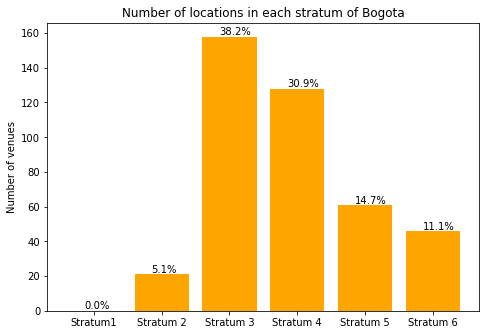

In [20]:
Freq1cero=FreqEstr(dfLugares1cero,1,'NLugares1cerosVSEstrato')

In [21]:
#con dos ceros
index2cero=[i for i in range(len(dfLugares123ceros)) if            
(dfLugares123ceros.iloc[i]['CRat']==0 and dfLugares123ceros.iloc[i]['Rat']==0 and dfLugares123ceros.iloc[i]['CFot']!=0 and dfLugares123ceros.iloc[i]['COpi']!=0) or
(dfLugares123ceros.iloc[i]['CRat']!=0 and dfLugares123ceros.iloc[i]['Rat']==0 and dfLugares123ceros.iloc[i]['CFot']==0 and dfLugares123ceros.iloc[i]['COpi']!=0) or
(dfLugares123ceros.iloc[i]['CRat']!=0 and dfLugares123ceros.iloc[i]['Rat']!=0 and dfLugares123ceros.iloc[i]['CFot']==0 and dfLugares123ceros.iloc[i]['COpi']==0) or
(dfLugares123ceros.iloc[i]['CRat']==0 and dfLugares123ceros.iloc[i]['Rat']!=0 and dfLugares123ceros.iloc[i]['CFot']==0 and dfLugares123ceros.iloc[i]['COpi']!=0) or
(dfLugares123ceros.iloc[i]['CRat']!=0 and dfLugares123ceros.iloc[i]['Rat']==0 and dfLugares123ceros.iloc[i]['CFot']!=0 and dfLugares123ceros.iloc[i]['COpi']==0) or
(dfLugares123ceros.iloc[i]['CRat']==0 and dfLugares123ceros.iloc[i]['Rat']!=0 and dfLugares123ceros.iloc[i]['CFot']!=0 and dfLugares123ceros.iloc[i]['COpi']==0)]
len(index2cero)
dfLugares2cero=dfLugares123ceros.iloc[index2cero,:]                                                   
#dfLugares2cero

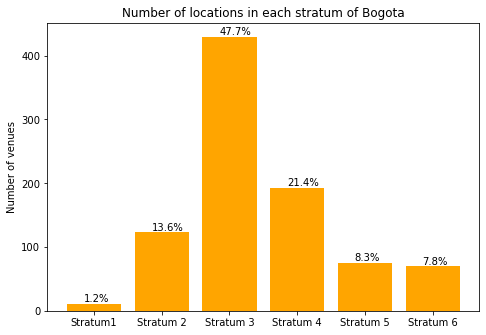

In [22]:
Freq2cero=FreqEstr(dfLugares2cero,3,'NLugares2cerosVSEstrato')

In [23]:
#con tres ceros
index3cero=[i for i in range(len(dfLugares123ceros)) if            
(dfLugares123ceros.iloc[i]['CRat']!=0 and dfLugares123ceros.iloc[i]['Rat']==0 and dfLugares123ceros.iloc[i]['CFot']==0 and dfLugares123ceros.iloc[i]['COpi']==0) or
(dfLugares123ceros.iloc[i]['CRat']==0 and dfLugares123ceros.iloc[i]['Rat']!=0 and dfLugares123ceros.iloc[i]['CFot']==0 and dfLugares123ceros.iloc[i]['COpi']==0) or
(dfLugares123ceros.iloc[i]['CRat']==0 and dfLugares123ceros.iloc[i]['Rat']==0 and dfLugares123ceros.iloc[i]['CFot']!=0 and dfLugares123ceros.iloc[i]['COpi']==0) or
(dfLugares123ceros.iloc[i]['CRat']==0 and dfLugares123ceros.iloc[i]['Rat']==0 and dfLugares123ceros.iloc[i]['CFot']==0 and dfLugares123ceros.iloc[i]['COpi']!=0)]
len(index3cero)
dfLugares3cero=dfLugares123ceros.iloc[index3cero,:]                                                   
#dfLugares3cero

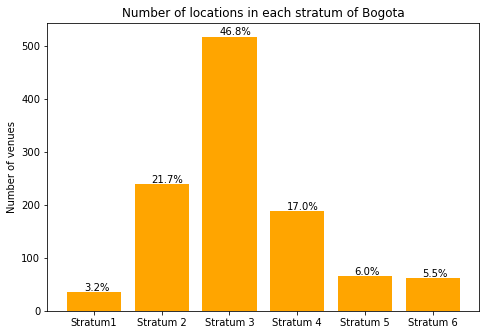

In [24]:
Freq3cero=FreqEstr(dfLugares3cero,3,'NLugares3cerosVSEstrato')

In [25]:
Freq1cero=Freq1cero.rename(columns={'FreqEstrato':'FreqEstrato1','FreqRelEstrato':'FreqRelEstrato1'})
Freq2cero=Freq2cero.rename(columns={'FreqEstrato':'FreqEstrato2','FreqRelEstrato':'FreqRelEstrato2'})
Freq3cero=Freq3cero.rename(columns={'FreqEstrato':'FreqEstrato3','FreqRelEstrato':'FreqRelEstrato3'})

In [26]:
dfFreq123=pd.concat([Freq1cero,Freq2cero,Freq3cero,], axis=1)
dfFreq123['FreqT']=dfFreq123['FreqEstrato1']+dfFreq123['FreqEstrato2']+dfFreq123['FreqEstrato3']
dfFreq123['FreqRelT']=100*dfFreq123['FreqT']/dfFreq123['FreqT'].sum()
dfFreq123

,FreqEstrato1,FreqRelEstrato1,FreqEstrato2,FreqRelEstrato2,FreqEstrato3,FreqRelEstrato3,FreqT,FreqRelT
Estrato,,,,,,,,
1,0,0.000000,11,1.219512,35,3.158845,46,1.897690
2,21,5.072464,123,13.636364,240,21.660650,384,15.841584
3,158,38.164251,430,47.671840,518,46.750903,1106,45.627063
4,128,30.917874,193,21.396896,188,16.967509,509,20.998350
5,61,14.734300,75,8.314856,66,5.956679,202,8.333333
6,46,11.111111,70,7.760532,61,5.505415,177,7.301980


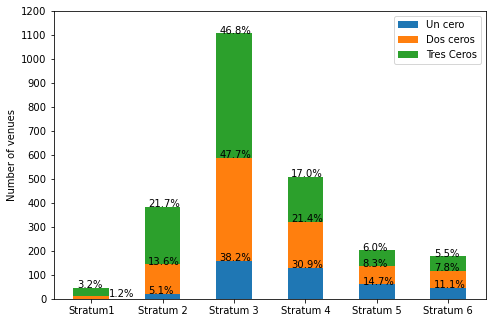

In [27]:
#se van a unir las graficas de los lugares con 1,2 y 3 ceros en una sola ya que tienen un comportamiento parecido
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
N = 6
Freq1 = dfFreq123['FreqEstrato1']
Freq2 = dfFreq123['FreqEstrato2']
Freq3 = dfFreq123['FreqEstrato3']

ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Freq1, width)
p2 = plt.bar(ind, Freq2, width,bottom=Freq1)
p3 = plt.bar(ind, Freq3, width,bottom=Freq1+Freq2)


plt.ylabel('Number of venues')
#plt.title('Scores by group and gender')
plt.xticks(ind, ('Stratum1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'))
plt.yticks(np.arange(0, 1300, 100))
plt.legend((p1[0], p2[0],p3[0]), ('Un cero', 'Dos ceros','Tres Ceros'))

for index,value in enumerate(dfFreq123['FreqRelEstrato1']):
    if index!=0:
        plt.annotate(str(round(value,1))+'%', xy=(index-0.2,(dfFreq123.iloc[index]['FreqEstrato1'])), color='black')
    
for index,value in enumerate(dfFreq123['FreqRelEstrato2']):
    if index==0:
        plt.annotate(str(round(value,1))+'%', xy=(index+0.25,(dfFreq123.iloc[index]['FreqEstrato2'])+(dfFreq123.iloc[index]['FreqEstrato1'])), color='black')
    else:
        plt.annotate(str(round(value,1))+'%', xy=(index-0.2,(dfFreq123.iloc[index]['FreqEstrato2'])+(dfFreq123.iloc[index]['FreqEstrato1'])), color='black')

for index,value in enumerate(dfFreq123['FreqRelEstrato3']):
    '''if index==0:
        print(index)
    else:'''
    plt.annotate(str(round(value,1))+'%', xy=(index-0.2,(dfFreq123.iloc[index]['FreqEstrato1'])+(dfFreq123.iloc[index]['FreqEstrato2'])+(dfFreq123.iloc[index]['FreqEstrato3'])), color='black')

plt.savefig('NLugares123cerosVSEstratoA.pdf', bbox_inches='tight')
plt.savefig('NLugares123cerosVSEstratoA.png', bbox_inches='tight')

plt.show()

plt.close(fig)
    


In [28]:
dfFreq123

,FreqEstrato1,FreqRelEstrato1,FreqEstrato2,FreqRelEstrato2,FreqEstrato3,FreqRelEstrato3,FreqT,FreqRelT
Estrato,,,,,,,,
1,0,0.000000,11,1.219512,35,3.158845,46,1.897690
2,21,5.072464,123,13.636364,240,21.660650,384,15.841584
3,158,38.164251,430,47.671840,518,46.750903,1106,45.627063
4,128,30.917874,193,21.396896,188,16.967509,509,20.998350
5,61,14.734300,75,8.314856,66,5.956679,202,8.333333
6,46,11.111111,70,7.760532,61,5.505415,177,7.301980


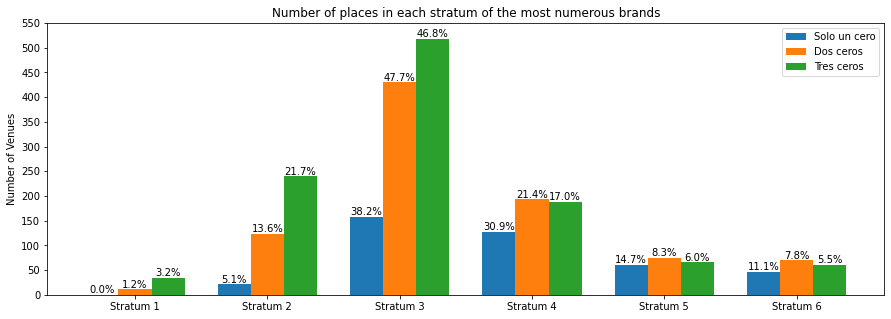

In [29]:
labels=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6']

x = 12*np.arange(len(labels))  # the label locations
y = np.arange(0,551,50)
width = 3  # the width of the bars

fig1, ax = plt.subplots()
dfFreq123
rects1= ax.bar(x-width, dfFreq123.iloc[0:6]['FreqEstrato1'].tolist(), width, label='Solo un cero')
rects2= ax.bar(x      , dfFreq123.iloc[0:6]['FreqEstrato2'].tolist(), width, label='Dos ceros')
rects3= ax.bar(x+width, dfFreq123.iloc[0:6]['FreqEstrato3'].tolist(), width, label='Tres ceros')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Venues')
ax.set_title('Number of places in each stratum of the most numerous brands')
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects,i):
    """Attach a text label above each bar in *rects*, displaying its height."""
    k=0
    for rect in rects:
        j=dfFreq123.iloc[k][i]
        height = rect.get_height()
        ax.annotate('{}%'.format(round(j,1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height+30),
                    xytext=(0, -15),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        k=k+1
autolabel(rects1,1)
autolabel(rects2,3)
autolabel(rects3,5)

#fig.tight_layout()
fig1.set_size_inches(15, 5, forward=True)
plt.savefig('NLugares123cerosVSEstratoB.pdf', bbox_inches='tight')
plt.savefig('NLugares123cerosVSEstratoB.png', bbox_inches='tight')
plt.show()
plt.close(fig)

In [30]:
#Funcion de Clusterizacion 

def Cluster(df,NClusInf,NClusSup):
    #Creamos un nuevo data frame solo con los atributos que seran relavantes para la clusterizacion, en este caso se 
    #hara con las 4 ultimas columnas
    dfCluster=df.iloc[:][{'CRat','Rat','COpi','CFot'}]#drop(columns=['name','categories','lat','lng','id','NumPunto','Estrato'])
    
    #Normalizamos
    X = dfCluster.values[:,:]
    X = np.nan_to_num(X)
    cluster_dataset = StandardScaler().fit_transform(X)
    
    #Se aplica KMeans con un numero de nudos que va desde NClusInf hasta NClusSup
    for i in range(NClusInf,NClusSup+1):
        k_means = KMeans(init="k-means++", n_clusters=i, n_init=100)
        k_means.fit(cluster_dataset)
        titcol='Cluster'+str(i)
        #Se agrega la columna que etiqueta los clusters al df 
        dfCluster[titcol]=k_means.labels_
        
    #se agrega el df de clusters al data frame original
    df=df.drop(columns=['CRat','Rat','CFot','COpi'])
    df=pd.concat([df,dfCluster],axis=1)
    return df

In [31]:
#________________________________________Analisis de lugares con 1,2 o 3 ceros________________________________________#
#agregamos columna de suma de las columnas de imagen
dfLugares123ceros['SumC']=dfLugares123ceros[['CRat','CFot','COpi']].sum(axis=1)
#dfLugares123ceros

c:\users\asus\opencv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


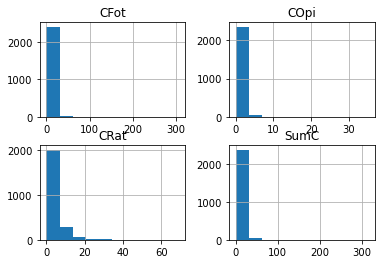

In [32]:
#Histograma
hist123cero = dfLugares123ceros.drop(columns=['name','categories','lat','lng','id','NumPunto','Estrato','Rat']).hist(bins=10)

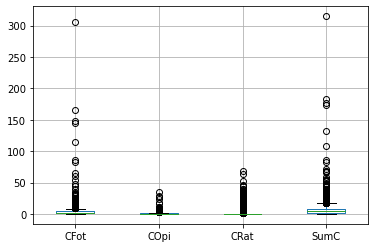

In [33]:
boxplot123cero = dfLugares123ceros.boxplot(column=['CFot', 'COpi', 'CRat','SumC'])

In [34]:
#Funcion que muestra decribe() y valores para un boxplot de un df
def DescBox(df):
    dfD=df.iloc[:][{'CRat','CFot','COpi','SumC'}].describe().T
    dfD['RanIQ']=dfD['75%']-dfD['25%']
    dfD['AtipLeveInf']=dfD['25%']-1.5*dfD['RanIQ']
    dfD['AtipLeveSup']=dfD['75%']+1.5*dfD['RanIQ']
    dfD['AtipExtrInf']=dfD['25%']-3*dfD['RanIQ']
    dfD['AtipExtrSup']=dfD['75%']+3*dfD['RanIQ']
    dfD
    return dfD

In [35]:
#describe 123 ceros
DescBox(dfLugares123ceros)

,count,mean,std,min,25%,50%,75%,max,RanIQ,AtipLeveInf,AtipLeveSup,AtipExtrInf,AtipExtrSup
COpi,2424.0,0.851073,1.704699,0.0,0.0,0.0,1.0,35.0,1.0,-1.5,2.5,-3.0,4.0
SumC,2424.0,6.768977,12.266753,0.0,2.0,4.0,8.0,315.0,6.0,-7.0,17.0,-16.0,26.0
CFot,2424.0,3.580858,9.931714,0.0,1.0,2.0,4.0,306.0,3.0,-3.5,8.5,-8.0,13.0
CRat,2424.0,2.337046,5.881679,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.0,0.0


In [36]:
dfLugares123ceros[dfLugares123ceros['SumC']>26]

,name,categories,lat,lng,id,NumPunto,Estrato,CRat,Rat,CFot,COpi,SumC
31,TransMilenio: Portal de Usme,Bus Station,4.531862,-74.119365,5053c92be4b0d211d0055980,1243,2,0.0,0.0,30.0,8.0,38.0
315,Terminal Satélite del Sur,Bus Station,4.597225,-74.176861,4cdb252bc409b60cb005d31a,2761,2,0.0,0.0,82.0,27.0,109.0
526,Panamericana,Bookstore,4.604791,-74.071693,4d9cb54f8efaa14361ef53b7,3029,3,44.0,6.6,15.0,0.0,59.0
872,Colsubsidio,Market,4.622772,-74.077526,57139944498e648da213610c,3575,3,17.0,7.5,11.0,0.0,28.0
973,Dog Dog,Hot Dog Joint,4.629953,-74.123362,50f9abc7e4b0d5fdfb10c7e1,3769,4,0.0,0.0,26.0,3.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7072,Carulla Express,Grocery Store,4.728095,-74.045024,4f49391fe4b0e7e90f8b73f0,13636,4,25.0,7.2,11.0,0.0,36.0
7108,Tiendas D1,Market,4.731584,-74.050128,54245812498e48e30f8a6e69,13693,4,26.0,7.3,0.0,3.0,29.0
7230,Sopitas El chorote,Soup Place,4.741708,-74.036020,5058c56fe4b020c39847b321,13882,3,27.0,6.7,0.0,4.0,31.0
7307,Open Down VIP,Bar,4.756033,-74.085795,4e3e2b12b0fb875af86ce66d,14087,2,0.0,0.0,47.0,24.0,71.0


In [37]:
#Clustering con de 1,2 o 3 ceros
dfLugares123Cluster=Cluster(dfLugares123ceros,3,7)

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
dfLugares123Cluster.drop(columns=['name','categories','lat','lng','id','NumPunto','Cluster6','Cluster3','Cluster4'
                                 ,'Cluster7']).groupby(by=['Cluster5']).describe()

Estrato                                                 SumC  \
           count      mean       std  min  25%  50%  75%  max   count   
Cluster5                                                                
0           62.0  4.225806  1.077632  3.0  3.0  4.0  5.0  6.0    62.0   
1         1480.0  3.232432  1.119029  1.0  3.0  3.0  4.0  6.0  1480.0   
2            7.0  3.571429  1.511858  2.0  2.5  3.0  4.5  6.0     7.0   
3          478.0  3.828452  1.079573  1.0  3.0  4.0  4.0  6.0   478.0   
4          397.0  3.372796  1.038193  1.0  3.0  3.0  4.0  6.0   397.0   

                                                                     COpi  \
                mean        std   min    25%    50%    75%    max   count   
Cluster5                                                                    
0          34.032258  13.635739  20.0   24.0   31.0   40.0   83.0    62.0   
1           3.358784   3.648009   1.0    1.0    2.0    4.0   54.0  1480.0   
2         165.714286  77.555817  71.0  120.5  173.0  180.0  315.0     7.0   
3          10.723849   6.443684   0.0    6.0   11.0   14.0   35.0   478.0   
4           7.659950   8.666826   2.0    4.0    5.0    8.0   86.0   397.0   

                                                                Rat            \
               mean        std  min   25%   50%   75%   max   count      mean   
Cluster5                                                                        
0          1.032258   1.974989  0.0   0.0   0.0   1.0  10.0    62.0  7.269355   
1          0.391216   0.488188  0.0   0.0   0.0   1.0   1.0  1480.0  0.000000   
2         20.428571  11.816050  0.0  14.5  24.0  27.5  35.0     7.0  1.000000   
3          0.422594   0.923302  0.0   0.0   0.0   0.0   7.0   478.0  6.987029   
4          2.707809   1.378135  0.0   2.0   2.0   3.0  17.0   397.0  0.016625   

                                                   CFot              \
               std  min    25%  50%    75%  max   count        mean   
Cluster5                                                              
0         0.869066  5.5  6.625  7.3  7.975  8.7    62.0    5.064516   
1         0.000000  0.0  0.000  0.0  0.000  0.0  1480.0    2.967568   
2         2.645751  0.0  0.000  0.0  0.000  7.0     7.0  144.000000   
3         0.686253  5.1  6.500  7.0  7.500  8.6   478.0    2.110879   
4         0.331245  0.0  0.000  0.0  0.000  6.6   397.0    4.929471   

                                                         CRat             \
                std   min   25%    50%     75%    max   count       mean   
Cluster5                                                                   
0          8.289577   0.0   0.0    1.0    6.75   32.0    62.0  27.935484   
1          3.656336   0.0   1.0    2.0    4.00   54.0  1480.0   0.000000   
2         82.561088  47.0  98.0  145.0  157.00  306.0     7.0   1.285714   
3          3.720058   0.0   0.0    1.0    2.00   21.0   478.0   8.190377   
4          8.267624   0.0   1.0    3.0    5.00   86.0   397.0   0.022670   

                                                     
                std   min    25%   50%    75%   max  
Cluster5                                             
0         10.686089  18.0  20.00  23.5  31.75  69.0  
1          0.000000   0.0   0.00   0.0   0.00   0.0  
2          3.401680   0.0   0.00   0.0   0.00   9.0  
3          4.458915   0.0   4.25   9.0  11.00  18.0  
4          0.451697   0.0   0.00   0.0   0.00   9.0

In [40]:
#________________________________________Analisis de lugares con ningun cero________________________________________#
#agregamos columna de suma de las columnas de apreciacion del publico
dfLugaresNone0['SumC']=dfLugaresNone0['CRat']+dfLugaresNone0['CFot']+dfLugaresNone0['COpi']
#dfLugaresNone0

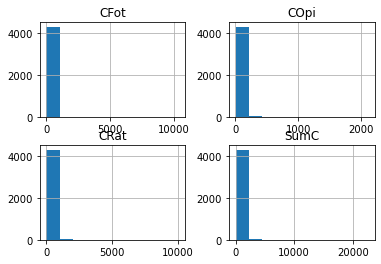

In [41]:
histTNone0 = dfLugaresNone0.iloc[:][{'CRat','CFot','COpi','SumC'}].hist(bins=10)

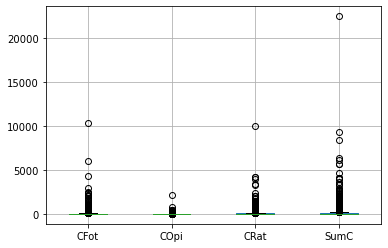

In [42]:
boxplotNone0 = dfLugaresNone0.boxplot(column=['CFot', 'COpi', 'CRat','SumC'])

In [43]:
DescBox(dfLugaresNone0)
#Por lo tanto los lugares que tengan mas de 270 en CFot, CRan o COpi haran parte de un grupo de lugares de asistencia 
#masiva en participacion ej aeropuerto, estadio...

,count,mean,std,min,25%,50%,75%,max,RanIQ,AtipLeveInf,AtipLeveSup,AtipExtrInf,AtipExtrSup
COpi,4314.0,17.537552,46.885198,1.0,3.0,6.0,16.0,2105.0,13.0,-16.5,35.5,-36.0,55.0
SumC,4314.0,157.618683,526.173577,4.0,24.0,46.0,123.0,22523.0,99.0,-124.5,271.5,-273.0,420.0
CFot,4314.0,54.800649,244.082387,1.0,6.0,13.0,36.0,10368.0,30.0,-39.0,81.0,-84.0,126.0
CRat,4314.0,85.280482,254.912375,1.0,13.0,25.0,68.0,10050.0,55.0,-69.5,150.5,-152.0,233.0


In [44]:
#al ver los valores maximos en dfCluster, los histogramas y los diagramas de caja se observa que hay valores atipicos en 
#las columnas que representan las cantidades de fotos, opiniones y calificaciones. A continuacion se identificaran esos 
#valores atipicos

#de esta forma se estaban excluyendo de forma dispar los lugares puesto que se daba diferente valor a tener una foto
#que a tener una opinion o una votacion

#Analisis mediante clusterizacion de los lugares con ningun cero, al ver los clusters se hace evidente que es necesario 
#dejar en otro grupo los lugares que tienen fotos, opiniones y calificaciones en cantidades fuera de lo comun (muchas)
#para definir cuantas 

#Considerando que CFot,Crat y COpi tienen un mismo valor para nuestro ranking se sacaran los valores atipicos con estos
#en base a estos, Ran tiene rango de 0 a 10 por lo que no se tendra en cuenta

In [45]:
#Condicional sobre alguna de las columnas de opinion o su suma
Max=272
dfLugaresNone0SA=dfLugaresNone0[dfLugaresNone0['SumC']<Max] #dataframe SinAtipicos

#dfLugaresNone0SA=dfLugaresNone0[dfLugaresNone0['CFot']<Max]
#dfLugaresNone0SA=dfLugaresNone0SA[dfLugaresNone0SA['CRat']<Max]
#dfLugaresNone0SA=dfLugaresNone0SA[dfLugaresNone0SA['COpi']<Max]
dfLugaresNone0SA

,name,categories,lat,lng,id,NumPunto,Estrato,CRat,Rat,CFot,COpi,SumC
32,Altavista Centro Comercial,Shopping Mall,4.531533,-74.117954,4e7395b41495dffb8efb639a,1244,2,51.0,6.9,31.0,7.0,89.0
33,Royal Films Multicine Altavista,Multiplex,4.532756,-74.118086,4fdf96fde4b0f37d57c9a91f,1244,2,17.0,6.3,12.0,5.0,34.0
37,Parque Entre Nubes,Outdoors & Recreation,4.539214,-74.093699,4e43ed7cae605a14b7dfb7ef,1399,2,10.0,6.7,11.0,2.0,23.0
93,Tiendas Metro 20 De Julio,Grocery Store,4.569346,-74.099905,4e24517bb3add90f9f4b7b76,2087,3,40.0,5.0,16.0,11.0,67.0
112,Bosque San Carlos,Park,4.574397,-74.105784,4e1085407d8b4d5613d24d70,2167,3,108.0,7.7,69.0,20.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7466,Hamburguesas El Corral,Burger Joint,4.807127,-74.038673,4d24c0c1e704b60cbd8463a9,14819,4,34.0,6.9,23.0,6.0,63.0
7471,Oktoberfest Guaymaral,Brewery,4.808195,-74.034961,5250647c498e85efc8d06423,14821,4,30.0,6.9,34.0,9.0,73.0
7483,TÍPICA sopas y picadas,Steakhouse,4.815070,-74.031742,53d41873498e67ffa980e88d,14903,6,12.0,6.4,13.0,5.0,30.0
7485,Al Limite Paintball,Paintball Field,4.818875,-74.032603,4ca77d9ba6e08cfa63508594,14944,6,37.0,8.2,51.0,13.0,101.0


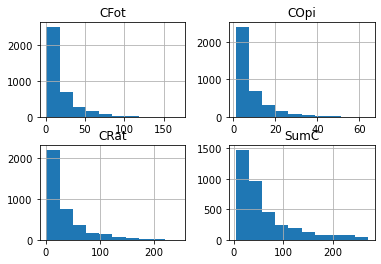

In [46]:
hist = dfLugaresNone0SA.drop(columns=['name','categories','lat','lng','id','NumPunto','Estrato','Rat']).hist(bins=10)

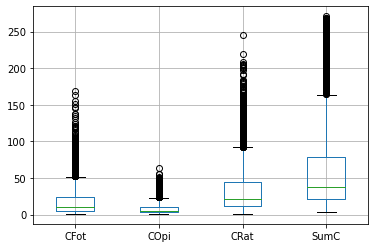

In [47]:
boxplot = dfLugaresNone0SA.boxplot(column=['CFot', 'COpi', 'CRat','SumC'])

In [48]:
pd.set_option('display.max_rows', 100)

In [49]:
#Los lugares atipicos que tienes exceso en fotos, opiniones y calificaciones (mas de 272 de estos en total) son
dfLugaresNone0A=dfLugaresNone0[dfLugaresNone0['SumC']>=Max] #dataframe atipicos

In [50]:
dfLugaresNone0A.describe()

,lat,lng,NumPunto,Estrato,CRat,Rat,CFot,COpi,SumC
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,4.672313,-74.064720,7547.112132,4.393382,433.284926,7.909375,307.823529,81.452206,822.560662
std,0.038607,0.026676,3705.831091,1.209094,607.297942,0.782312,629.909528,110.785881,1292.126456
min,4.585509,-74.153970,2598.000000,1.000000,8.000000,4.900000,1.000000,3.000000,272.000000
25%,4.648928,-74.074289,4723.500000,3.000000,204.750000,7.500000,108.750000,39.750000,360.750000
50%,4.672746,-74.055642,5468.000000,4.000000,292.000000,8.000000,166.500000,60.000000,511.500000
75%,4.695969,-74.047746,11932.000000,5.000000,461.250000,8.500000,302.000000,92.250000,846.000000
max,4.806557,-74.015642,14363.000000,6.000000,10050.000000,9.300000,10368.000000,2105.000000,22523.000000


In [51]:
#_______________________________________Analisis de lugares que no tienen todo cero_______________________________________#
dfLugaresNAZ=dfLugares123ceros.append(dfLugaresNone0) #NAC not all zero
#dfLugaresNAZ

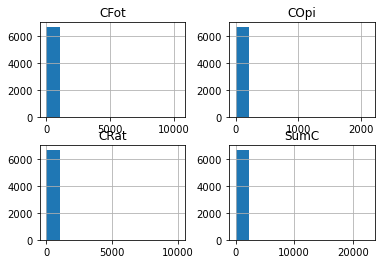

In [52]:
#Histogramas
hist = dfLugaresNAZ.drop(columns=['name','categories','lat','lng','id','NumPunto','Estrato','Rat']).hist(bins=10)

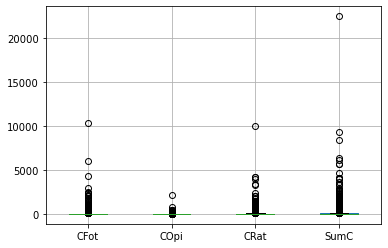

In [53]:
boxplot = dfLugaresNAZ.boxplot(column=['CFot', 'COpi', 'CRat','SumC'])

In [54]:
#Descripcion y rango atipico
DescBox(dfLugaresNAZ)

,count,mean,std,min,25%,50%,75%,max,RanIQ,AtipLeveInf,AtipLeveSup,AtipExtrInf,AtipExtrSup
COpi,6738.0,11.534580,38.372908,0.0,1.0,3.0,9.0,2105.0,8.0,-11.0,21.0,-23.0,33.0
SumC,6738.0,103.350401,427.246973,0.0,6.0,23.0,67.0,22523.0,61.0,-85.5,158.5,-177.0,250.0
CFot,6738.0,36.374295,196.927087,0.0,2.0,6.0,20.0,10368.0,18.0,-25.0,47.0,-52.0,74.0
CRat,6738.0,55.441526,207.839831,0.0,0.0,13.0,37.0,10050.0,37.0,-55.5,92.5,-111.0,148.0


In [55]:
#Exclusion de valores atipicos
limit=159
dfLugaresNAZsa=dfLugaresNAZ[dfLugaresNAZ['SumC']<limit]#DF sin atipicos
dfLugaresNAZat=dfLugaresNAZ[dfLugaresNAZ['SumC']>=limit]#DF atipicos
#dfLugaresNAZsa
#dfLugaresNAZat

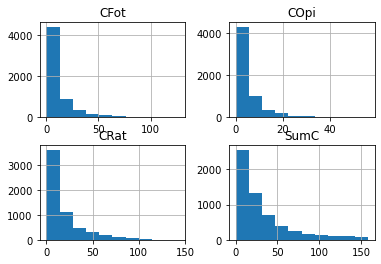

In [56]:
#Histogramas
hist = dfLugaresNAZsa.drop(columns=['name','categories','lat','lng','id','NumPunto','Estrato','Rat']).hist(bins=10)

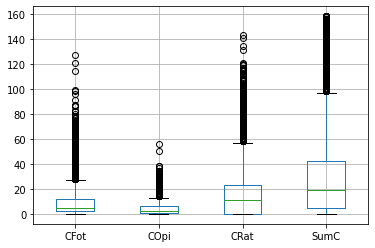

In [57]:
boxplot = dfLugaresNAZsa.boxplot(column=['CFot', 'COpi', 'CRat','SumC'])

In [58]:
#Descripcion del df sin atipicos
DescBox(dfLugaresNAZsa)

,count,mean,std,min,25%,50%,75%,max,RanIQ,AtipLeveInf,AtipLeveSup,AtipExtrInf,AtipExtrSup
COpi,5870.0,4.247359,5.370302,0.0,1.0,2.0,6.0,56.0,5.0,-6.5,13.5,-14.0,21.0
SumC,5870.0,30.874106,34.589115,0.0,5.0,19.0,42.0,158.0,37.0,-50.5,97.5,-106.0,153.0
CFot,5870.0,9.735264,12.764927,0.0,2.0,5.0,12.0,127.0,10.0,-13.0,27.0,-28.0,42.0
CRat,5870.0,16.891482,21.120002,0.0,0.0,11.0,23.0,143.0,23.0,-34.5,57.5,-69.0,92.0


In [59]:
##Descripcion del df de atipicos
#DescBox(dfLugaresNAZat)
dfLugaresNAZat.sort_values(by='SumC')

,name,categories,lat,lng,id,NumPunto,Estrato,CRat,Rat,CFot,COpi,SumC
1715,69 Gauchos,Argentinian Restaurant,4.654046,-74.059519,54602897498e9df08d42db1e,4438,4,92.0,8.7,42.0,25.0,159.0
3906,Charlotte - Pastelería,Bakery,4.732439,-74.051868,4d6ed1b03a6cf04d18375779,6185,4,110.0,7.1,22.0,27.0,159.0
3492,Casino Hollywood,Casino,4.712621,-74.071083,4cd6ec24fb595481a3a8e650,5757,4,87.0,6.1,63.0,9.0,159.0
4724,Shawarma Khalifa,Falafel Restaurant,4.600635,-74.070912,4dd6b0acd22d38ef42d5db2c,10398,3,77.0,7.1,55.0,27.0,159.0
7314,Ciclovia,Bike Rental / Bike Share,4.755949,-74.059166,4f5399cee4b092980f1c70c2,14101,4,102.0,8.5,55.0,2.0,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3287,Unicentro,Shopping Mall,4.702112,-74.041616,4b5b6d61f964a52034fd28e3,5553,5,4223.0,8.6,1608.0,303.0,6134.0
2126,Centro Comercial Andino,Shopping Mall,4.666715,-74.053092,4bb8e2367421a593c439c240,4727,5,3985.0,8.7,2124.0,312.0,6421.0
1502,Estadio Nemesio Camacho El Campín,Soccer Stadium,4.646067,-74.077288,4bfdb29cbf6576b0e5b0adb8,4269,4,2066.0,8.7,6046.0,324.0,8436.0
5892,Andrés D.C.,Steakhouse,4.666376,-74.054429,4b808d29f964a5203f7c30e3,12220,5,4238.0,8.8,4308.0,835.0,9381.0


In [60]:
#Cluster NAZ sin atipicos
dfLugaresNAZsaCluster=Cluster(dfLugaresNAZsa,3,7)
dfLugaresNAZsaCluster

,name,categories,lat,lng,id,NumPunto,Estrato,SumC,COpi,Rat,CFot,CRat,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7
1,Plaza de Usme,Plaza,4.469970,-74.126363,4f4a3862e4b0eddb52dd97bb,135,2,12.0,0.0,0.0,12.0,0.0,0,1,0,1,1
3,agroparque los soches,Field,4.483056,-74.091950,51ebe330498eecb9a833ac50,367,1,3.0,0.0,0.0,3.0,0.0,0,1,0,1,1
5,Parque Nacional Natural Sumapaz,Mountain,4.496649,-74.122158,4f4a9b3fe4b0962089c459a9,576,1,12.0,0.0,0.0,12.0,0.0,0,1,0,1,1
6,Parque cantarrana,Dog Run,4.496933,-74.117834,50e34c2ee4b05f2b166bd9bd,578,1,7.0,2.0,0.0,5.0,0.0,0,1,0,1,1
7,Panaderia Ramirez 2,Deli / Bodega,4.497773,-74.108141,536e92eb498ecc66d33654db,583,1,1.0,0.0,0.0,1.0,0.0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7466,Hamburguesas El Corral,Burger Joint,4.807127,-74.038673,4d24c0c1e704b60cbd8463a9,14819,4,63.0,6.0,6.9,23.0,34.0,2,3,1,0,0
7471,Oktoberfest Guaymaral,Brewery,4.808195,-74.034961,5250647c498e85efc8d06423,14821,4,73.0,9.0,6.9,34.0,30.0,1,3,1,0,2
7483,TÍPICA sopas y picadas,Steakhouse,4.815070,-74.031742,53d41873498e67ffa980e88d,14903,6,30.0,5.0,6.4,13.0,12.0,2,0,3,0,0
7485,Al Limite Paintball,Paintball Field,4.818875,-74.032603,4ca77d9ba6e08cfa63508594,14944,6,101.0,13.0,8.2,51.0,37.0,1,2,2,5,4


In [61]:
#descripcion por etiqueta de cluster
C=4
dfC=dfLugaresNAZsaCluster.iloc[:][{'Estrato','SumC','CRat','Rat','CFot','COpi','Cluster'+str(C)}].groupby(by=['Cluster'+str(C)]).mean()#.sort_values(by='Cluster4',ascending=False)
dfC['Count']=dfLugaresNAZsaCluster.iloc[:][{'Estrato','SumC','CRat','Rat','CFot','COpi','Cluster'+str(C)}].groupby(by=['Cluster'+str(C)]).count().Rat
dfC['Std']=dfLugaresNAZsaCluster.iloc[:][{'Estrato','Cluster'+str(C)}].groupby(by=['Cluster'+str(C)]).std()
dfC

,Rat,CFot,COpi,CRat,Estrato,SumC,Count,Std
Cluster4,,,,,,,,
0,6.993298,5.391500,2.706988,13.151206,3.971802,21.249694,2447,1.101002
1,0.000000,3.264957,0.862714,0.000000,3.262821,4.127671,1872,1.102616
2,7.351378,36.444882,16.358268,65.574803,4.236220,118.377953,508,1.179755
3,7.215628,18.530201,8.037392,32.272291,4.128476,58.839885,1043,1.140253


In [62]:
Est=[]
Count=[]
S=[]

for D in range(3,8):
    Est.append(round(dfLugaresNAZsaCluster.iloc[:][{'Estrato','SumC','CRat','Rat','CFot','COpi','Cluster'+str(D)}].groupby(by=['Cluster'+str(D)]).mean().Estrato.std(),2))
    Count.append(round(dfLugaresNAZsaCluster.iloc[:][{'Estrato','SumC','CRat','Rat','CFot','COpi','Cluster'+str(D)}].groupby(by=['Cluster'+str(D)]).count().Estrato.std(),2))  
    S.append(round(dfLugaresNAZsaCluster.iloc[:][{'Estrato','SumC','CRat','Rat','CFot','COpi','Cluster'+str(D)}].groupby(by=['Cluster'+str(D)]).mean().SumC.std(),4))
dtas={'Number of Clusters':[3,4,5,6,7],
      'Mean Estratum':Est,
      'Mean Count':Count,
      'Mean SumC':S}
tabl=pd.DataFrame(data=dtas)
tabl.set_index('Number of Clusters', inplace=True)
tabl

,Mean Estratum,Mean Count,Mean SumC
Number of Clusters,,,
3,0.49,1126.83,50.0144
4,0.44,860.98,50.6058
5,0.39,938.95,49.8622
6,0.36,827.15,49.4370
7,0.35,783.48,48.6623


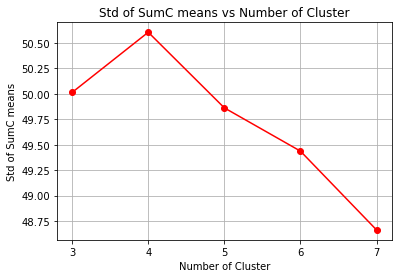

In [63]:
plt.plot(tabl.index, tabl.iloc[:]['Mean SumC'],color='red', marker='o')
plt.title('Std of SumC means vs Number of Cluster')
plt.xlabel('Number of Cluster')
plt.ylabel('Std of SumC means')
plt.grid(True)
plt.xticks([3,4,5,6,7])
plt.savefig('Line.png', bbox_inches='tight')
plt.show()

In [79]:
datas={'Clasification':['A','B','C','D','E','F'],
       'Description':['All Zeros Venues',
                      'Cluster 0 Label',
                      'Cluster 1 Label',
                      'Cluster 2 Label',
                      'Cluster 3 Label',
                      'Highly Appreciated Places'],
       'Count':[len(dfLugaresT0),
                dfC.iloc[0]['Count'],
                dfC.iloc[1]['Count'],
                dfC.iloc[2]['Count'],
                dfC.iloc[3]['Count'],
                len(dfLugaresNAZat)],
       'Average Stratum':[dfLugaresT0.Estrato.mean(),
                          dfC.iloc[0]['Estrato'],
                          dfC.iloc[1]['Estrato'],
                          dfC.iloc[2]['Estrato'],
                          dfC.iloc[3]['Estrato'],
                          dfLugaresNAZat.Estrato.mean()],
       'Std Straum':[dfLugaresT0.Estrato.std(),
                     dfC.iloc[0]['Std'],
                     dfC.iloc[1]['Std'],
                     dfC.iloc[2]['Std'],
                     dfC.iloc[3]['Std'],
                     dfLugaresNAZat.Estrato.std()],
       'Kurtosis':[dfLugaresT0.Estrato.kurtosis(),
                   dfLugaresNAZsaCluster[dfLugaresNAZsaCluster['Cluster4']==0].Estrato.kurtosis(),
                   dfLugaresNAZsaCluster[dfLugaresNAZsaCluster['Cluster4']==1].Estrato.kurtosis(),
                   dfLugaresNAZsaCluster[dfLugaresNAZsaCluster['Cluster4']==2].Estrato.kurtosis(),
                   dfLugaresNAZsaCluster[dfLugaresNAZsaCluster['Cluster4']==3].Estrato.kurtosis(),
                   dfLugaresNAZat.Estrato.kurtosis()]}
tabla=pd.DataFrame(data=datas)
tabla=tabla.sort_values(by='Average Stratum')
tabla.at[2,'Clasification']='B'
tabla.at[1,'Clasification']='C'
tabla.at[4,'Clasification']='D'
tabla.at[3,'Clasification']='E'
tabla.set_index('Clasification', inplace=True)

tabla


,Description,Count,Average Stratum,Std Straum,Kurtosis
Clasification,,,,,
A,All Zeros Venues,750.0,3.173333,1.197163,0.469789
B,Cluster 1 Label,1872.0,3.262821,1.102616,0.543549
C,Cluster 0 Label,2447.0,3.971802,1.101002,-0.670343
D,Cluster 3 Label,1043.0,4.128476,1.140253,-0.907376
E,Cluster 2 Label,508.0,4.236220,1.179755,-1.001810
F,Highly Appreciated Places,868.0,4.354839,1.181709,-0.962634


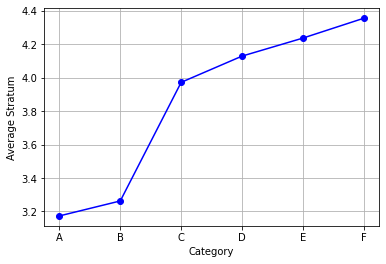

In [82]:
plt.plot(tabla.index, tabla.iloc[:]['Average Stratum'],color='blue', marker='o')
#plt.title('Std of SumC means vs Number of Cluster')
plt.xlabel('Category')
plt.ylabel('Average Stratum')
plt.grid(True)
#plt.xticks([3,4,5,6,7])
plt.savefig('EstratoVSCategoria.png', bbox_inches='tight')
plt.show()

In [65]:
dfLugaresNAZsaCluster[dfLugaresNAZsaCluster['Cluster4']==0].Estrato.kurtosis()

-0.6703433269768815

In [66]:
dfLugaresNAZsaCluster[dfLugaresNAZsaCluster['Cluster4']==1]

,name,categories,lat,lng,id,NumPunto,Estrato,SumC,COpi,Rat,CFot,CRat,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7
1,Plaza de Usme,Plaza,4.469970,-74.126363,4f4a3862e4b0eddb52dd97bb,135,2,12.0,0.0,0.0,12.0,0.0,0,1,0,1,1
3,agroparque los soches,Field,4.483056,-74.091950,51ebe330498eecb9a833ac50,367,1,3.0,0.0,0.0,3.0,0.0,0,1,0,1,1
5,Parque Nacional Natural Sumapaz,Mountain,4.496649,-74.122158,4f4a9b3fe4b0962089c459a9,576,1,12.0,0.0,0.0,12.0,0.0,0,1,0,1,1
6,Parque cantarrana,Dog Run,4.496933,-74.117834,50e34c2ee4b05f2b166bd9bd,578,1,7.0,2.0,0.0,5.0,0.0,0,1,0,1,1
7,Panaderia Ramirez 2,Deli / Bodega,4.497773,-74.108141,536e92eb498ecc66d33654db,583,1,1.0,0.0,0.0,1.0,0.0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7476,Club Nimajay de Bavaria,Athletics & Sports,4.806937,-74.030904,503a77eee4b07c3e082dc19e,14823,6,10.0,2.0,0.0,8.0,0.0,0,1,0,1,1
7479,Aviopartes,Airport Terminal,4.815171,-74.068982,4c8010d751ada1cd33560610,14885,6,1.0,0.0,0.0,1.0,0.0,0,1,0,1,1
7480,Torre De Control Aeropuerto Guaymaral,Airport,4.814531,-74.067583,515ebd37e4b08ba1ecc215ac,14885,6,4.0,0.0,0.0,4.0,0.0,0,1,0,1,1
7482,Canchas ETB - Torneo Revengue,Soccer Field,4.814210,-74.034938,506880bfe4b08b3221350cc4,14902,6,6.0,1.0,0.0,5.0,0.0,0,1,0,1,1


In [67]:
#Cluster NAZ de atipicos
dfLugaresNAZatCluster=Cluster(dfLugaresNAZat,3,7)
dfLugaresNAZatCluster

,name,categories,lat,lng,id,NumPunto,Estrato,SumC,COpi,Rat,CFot,CRat,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7
3758,HQ Simplevector,Art Gallery,4.723161,-74.026302,50e8cba5e4b005f7a699a3b0,6003,4,315.0,0.0,7.0,306.0,9.0,0,3,0,1,0
4052,TransMilenio: Portal de Suba,Bus Station,4.746898,-74.094286,4ba060d9f964a5201d6b37e3,6405,3,183.0,35.0,0.0,148.0,0.0,0,3,0,5,3
4393,Club Campestre Bellavista (Colsubsidio),Other Great Outdoors,4.823301,-74.036126,4d79894fb39b2c0fc07ce590,7459,6,173.0,28.0,0.0,145.0,0.0,0,3,0,5,3
4807,Funicular de Monserrate,Light Rail Station,4.603011,-74.061208,4fca783fe4b05d86f26cd18e,10510,3,177.0,11.0,0.0,166.0,0.0,0,3,0,5,3
112,Bosque San Carlos,Park,4.574397,-74.105784,4e1085407d8b4d5613d24d70,2167,3,197.0,20.0,7.7,69.0,108.0,0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,San Andresito Norte,Department Store,4.773086,-74.042177,4cb227b0ef1b3704111a4900,14363,2,353.0,17.0,6.2,41.0,295.0,0,3,0,1,6
7416,McDonald's,Burger Joint,4.772959,-74.042221,4c37b155ae2da593fb5fffc5,14363,2,225.0,13.0,5.9,80.0,132.0,0,3,0,1,6
7422,Pavo Munich,Sandwich Place,4.776968,-74.041793,4d3df832b1f76a319088b0df,14413,2,177.0,23.0,8.7,32.0,122.0,0,0,1,4,4
7454,Hacienda La Margarita,Stables,4.797653,-74.041042,4f96ff38e4b036b6bb8bb495,14697,6,221.0,32.0,6.8,83.0,106.0,0,3,0,1,6


In [68]:
#descripcion por etiqueta de cluster
C=3
dfLugaresNAZatCluster.iloc[:][{'Estrato','SumC','CRat','Rat','CFot','COpi','Cluster'+str(C)}].groupby(by=['Cluster'+str(C)]).describe()#.sort_values(by='SumC',ascending=False)

Rat                                                   CFot  \
          count      mean       std  min    25%   50%  75%  max  count   
Cluster3                                                                 
0         845.0  7.727929  0.936579  0.0  7.200  7.80  8.4  9.5  845.0   
1           1.0  8.000000       NaN  8.0  8.000  8.00  8.0  8.0    1.0   
2          22.0  8.381818  0.831886  5.5  8.125  8.65  8.9  9.3   22.0   

                                                                          \
                  mean          std      min       25%      50%      75%   
Cluster3                                                                   
0           160.390533   174.852047      1.0     62.00    104.0    190.0   
1         10368.000000          NaN  10368.0  10368.00  10368.0  10368.0   
2          1911.181818  1258.694397    577.0   1145.25   1623.0   2161.5   

                    COpi                                                    \
              max  count         mean         std     min      25%     50%   
Cluster3                                                                     
0          2411.0  845.0    52.200000   40.017727     0.0    26.00    40.0   
1         10368.0    1.0  2105.000000         NaN  2105.0  2105.00  2105.0   
2          6046.0   22.0   298.818182  153.042987   145.0   205.25   267.0   

                           CRat                                               \
             75%     max  count          mean          std      min      25%   
Cluster3                                                                       
0           67.0   258.0  845.0    259.358580   196.495608      0.0    126.0   
1         2105.0  2105.0    1.0  10050.000000          NaN  10050.0  10050.0   
2          321.0   835.0   22.0   2054.727273  1071.868648   1053.0   1244.0   

                                    Estrato                                \
              50%      75%      max   count      mean       std  min  25%   
Cluster3                                                                    
0           192.0    330.0   1315.0   845.0  4.350296  1.178557  1.0  3.0   
1         10050.0  10050.0  10050.0     1.0  6.000000       NaN  6.0  6.0   
2          1603.0   2309.0   4238.0    22.0  4.454545  1.299350  1.0  4.0   

                          SumC                                                \
          50%  75%  max  count          mean          std      min       25%   
Cluster3                                                                       
0         4.0  5.0  6.0  845.0    471.949112   365.822408    159.0    224.00   
1         6.0  6.0  6.0    1.0  22523.000000          NaN  22523.0  22523.00   
2         5.0  5.0  6.0   22.0   4264.727273  1958.437550   2261.0   2784.75   

                                     
              50%      75%      max  
Cluster3                             
0           340.0    584.0   2542.0  
1         22523.0  22523.0  22523.0  
2          3827.0   5399.0   9381.0

In [69]:
dfLugaresNAZatCluster[dfLugaresNAZatCluster['Cluster3']==0]

,name,categories,lat,lng,id,NumPunto,Estrato,SumC,COpi,Rat,CFot,CRat,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7
3758,HQ Simplevector,Art Gallery,4.723161,-74.026302,50e8cba5e4b005f7a699a3b0,6003,4,315.0,0.0,7.0,306.0,9.0,0,3,0,1,0
4052,TransMilenio: Portal de Suba,Bus Station,4.746898,-74.094286,4ba060d9f964a5201d6b37e3,6405,3,183.0,35.0,0.0,148.0,0.0,0,3,0,5,3
4393,Club Campestre Bellavista (Colsubsidio),Other Great Outdoors,4.823301,-74.036126,4d79894fb39b2c0fc07ce590,7459,6,173.0,28.0,0.0,145.0,0.0,0,3,0,5,3
4807,Funicular de Monserrate,Light Rail Station,4.603011,-74.061208,4fca783fe4b05d86f26cd18e,10510,3,177.0,11.0,0.0,166.0,0.0,0,3,0,5,3
112,Bosque San Carlos,Park,4.574397,-74.105784,4e1085407d8b4d5613d24d70,2167,3,197.0,20.0,7.7,69.0,108.0,0,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7415,San Andresito Norte,Department Store,4.773086,-74.042177,4cb227b0ef1b3704111a4900,14363,2,353.0,17.0,6.2,41.0,295.0,0,3,0,1,6
7416,McDonald's,Burger Joint,4.772959,-74.042221,4c37b155ae2da593fb5fffc5,14363,2,225.0,13.0,5.9,80.0,132.0,0,3,0,1,6
7422,Pavo Munich,Sandwich Place,4.776968,-74.041793,4d3df832b1f76a319088b0df,14413,2,177.0,23.0,8.7,32.0,122.0,0,0,1,4,4
7454,Hacienda La Margarita,Stables,4.797653,-74.041042,4f96ff38e4b036b6bb8bb495,14697,6,221.0,32.0,6.8,83.0,106.0,0,3,0,1,6
